## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df=pd.read_csv('results.csv')

In [3]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True


In [4]:
df.tournament.value_counts()

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
OSN Cup                                     4
World Unity Cup                             4
Copa América qualification                  2
Atlantic Heritage Cup                       2
AFF Championship qualification              2
Name: tournament, Length: 112, dtype: int64

In [5]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [6]:
df_1=df[df.tournament=='FIFA World Cup']

In [7]:
df_2=df_1.melt(id_vars=['home_team'],value_vars=['home_score'])

In [8]:
df_2.rename(columns={'home_team':'team'},inplace=True)

In [9]:
df_3=df_1.melt(id_vars=['away_team'],value_vars=['away_score'])

In [10]:
df_2

,team,variable,value
0,Belgium,home_score,0
1,France,home_score,4
2,Brazil,home_score,1
3,Peru,home_score,1
4,Argentina,home_score,1
...,...,...,...
895,Russia,home_score,2
896,France,home_score,1
897,Croatia,home_score,2
898,Belgium,home_score,2


In [11]:
df_3.rename(columns={'away_team':'team'},inplace=True)

In [12]:
df_4 = pd.concat([df_2,df_3])

In [13]:
df_4

,team,variable,value
0,Belgium,home_score,0
1,France,home_score,4
2,Brazil,home_score,1
3,Peru,home_score,1
4,Argentina,home_score,1
...,...,...,...
895,Croatia,away_score,2
896,Belgium,away_score,0
897,England,away_score,1
898,England,away_score,0


In [14]:
df_5=df_4.groupby('team').sum().sort_values(by='value',ascending=False)

In [15]:
df_5

,value
team,
Brazil,229
Germany,226
Argentina,137
Italy,128
France,120
...,...
Canada,0
Trinidad and Tobago,0
China PR,0


<AxesSubplot:xlabel='team'>

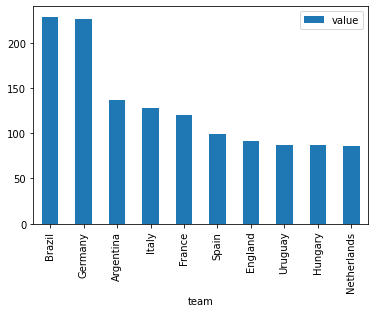

In [16]:
df_5.head(10).plot.bar()

## Task
What is the number of matches played in each tournament throughout history?

In [45]:
import seaborn as sns

In [50]:
df_7=df.groupby('tournament',as_index=False).count().sort_values(by='date',ascending = False).head(30)


In [58]:
df_8=df[df["tournament"].isin(df_7['tournament'])].groupby('tournament',as_index=False).count()

In [70]:
df_8.tournament.value_counts()

Korea Cup                               1
UEFA Euro                               1
UEFA Euro qualification                 1
COSAFA Cup                              1
Amílcar Cabral Cup                      1
King's Cup                              1
African Cup of Nations qualification    1
African Nations Championship            1
Friendly                                1
FIFA World Cup qualification            1
UNCAF Cup                               1
South Pacific Games                     1
African Cup of Nations                  1
FIFA World Cup                          1
UEFA Nations League                     1
AFC Asian Cup                           1
Island Games                            1
Merdeka Tournament                      1
CFU Caribbean Cup qualification         1
Gulf Cup                                1
Nordic Championship                     1
Copa América                            1
SAFF Cup                                1
Gold Cup                          

In [68]:
df_8.rename(columns={'date':'count'},inplace=True)

[Text(0, 0, 'AFC Asian Cup'),
 Text(1, 0, 'AFC Asian Cup qualification'),
 Text(2, 0, 'AFF Championship'),
 Text(3, 0, 'African Cup of Nations'),
 Text(4, 0, 'African Cup of Nations qualification'),
 Text(5, 0, 'African Nations Championship'),
 Text(6, 0, 'Amílcar Cabral Cup'),
 Text(7, 0, 'British Championship'),
 Text(8, 0, 'CECAFA Cup'),
 Text(9, 0, 'CFU Caribbean Cup'),
 Text(10, 0, 'CFU Caribbean Cup qualification'),
 Text(11, 0, 'COSAFA Cup'),
 Text(12, 0, 'Confederations Cup'),
 Text(13, 0, 'Copa América'),
 Text(14, 0, 'FIFA World Cup'),
 Text(15, 0, 'FIFA World Cup qualification'),
 Text(16, 0, 'Friendly'),
 Text(17, 0, 'Gold Cup'),
 Text(18, 0, 'Gulf Cup'),
 Text(19, 0, 'Island Games'),
 Text(20, 0, "King's Cup"),
 Text(21, 0, 'Korea Cup'),
 Text(22, 0, 'Merdeka Tournament'),
 Text(23, 0, 'Nordic Championship'),
 Text(24, 0, 'SAFF Cup'),
 Text(25, 0, 'South Pacific Games'),
 Text(26, 0, 'UEFA Euro'),
 Text(27, 0, 'UEFA Euro qualification'),
 Text(28, 0, 'UEFA Nations League')

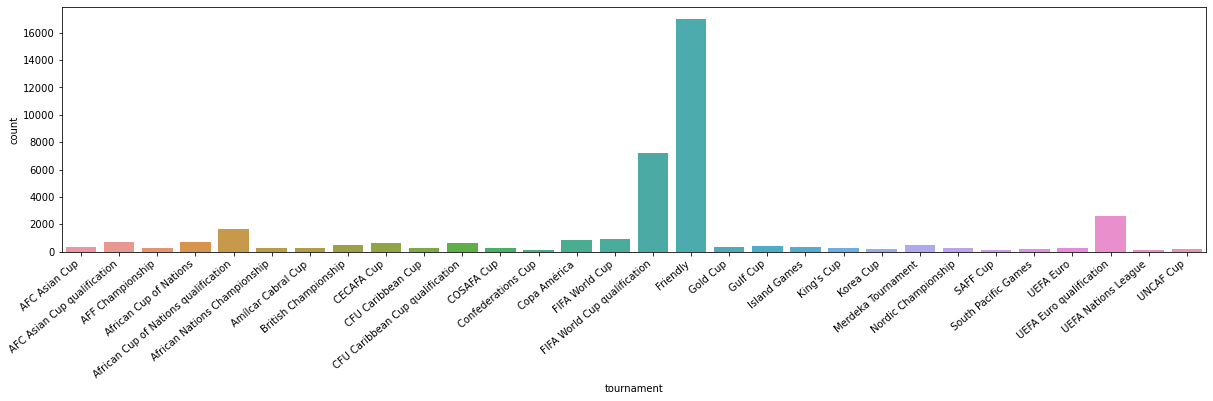

In [81]:
#sns.countplot()
g=sns.barplot(data=df_8,x='tournament',y='count',color=None)
g.figure.set_size_inches(20.5, 4.5)
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")



## Task 
Show the trend in number of matches per year.

In [84]:
df['date']=pd.to_datetime(df.date,format='%Y-%m-%d',)

In [85]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [86]:
df['year'] = pd.DatetimeIndex(df['date']).year

Text(0, 0.5, 'Count')

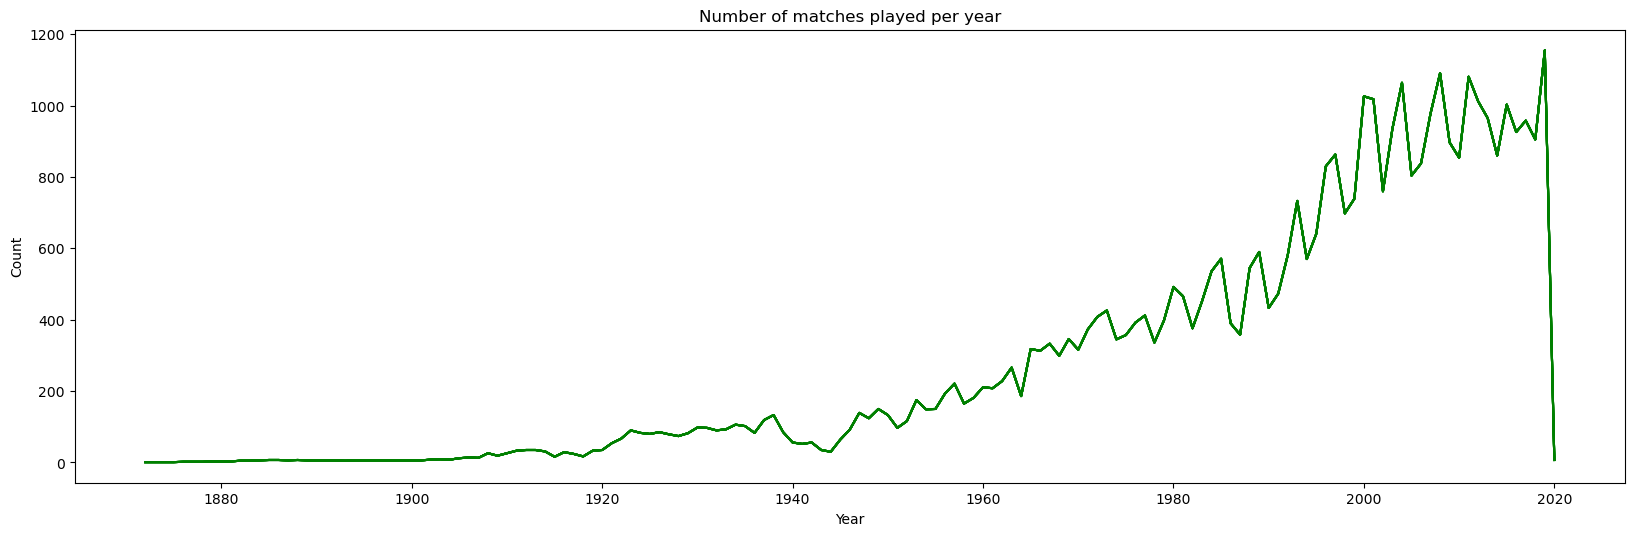

In [93]:
plt.figure(figsize=(20,6),dpi=100)
plt.plot(df.groupby('year').count(),'-g')
plt.title('Number of matches played per year')
plt.xlabel('Year')
plt.ylabel('Count')


## Task
Which teams are the most successful ones? (winning percentage)

In [137]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [138]:
df['winner'] = np.where(df['home_score'] > df['away_score'], df['home_team'] , df['away_team'])


In [139]:
df['winner']= np.where(df['home_score'] == df['away_score'], np.nan , df['winner'])

In [140]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


In [178]:
df_9=df.groupby('home_team').count()+df.groupby('away_team').count()

In [143]:
df_9.head()

,away_score,away_team,city,country,date,home_score,home_team,neutral,tournament,winner
Abkhazia,28.0,NaN,28.0,28.0,28.0,28.0,NaN,28.0,28.0,16.0
Afghanistan,111.0,NaN,111.0,111.0,111.0,111.0,NaN,111.0,111.0,87.0
Albania,332.0,NaN,332.0,332.0,332.0,332.0,NaN,332.0,332.0,263.0
Alderney,19.0,NaN,19.0,19.0,19.0,19.0,NaN,19.0,19.0,19.0
Algeria,505.0,NaN,505.0,505.0,505.0,505.0,NaN,505.0,505.0,366.0


In [179]:
df_9['win_count']=df.groupby('winner').count().date

In [162]:
df_9.head()

,away_score,away_team,city,country,date,home_score,home_team,neutral,tournament,winner,win_perc,win_count
Abkhazia,28.0,NaN,28.0,28.0,28.0,28.0,NaN,28.0,28.0,16.0,0.571429,12.0
Afghanistan,111.0,NaN,111.0,111.0,111.0,111.0,NaN,111.0,111.0,87.0,0.783784,30.0
Albania,332.0,NaN,332.0,332.0,332.0,332.0,NaN,332.0,332.0,263.0,0.792169,84.0
Alderney,19.0,NaN,19.0,19.0,19.0,19.0,NaN,19.0,19.0,19.0,1.000000,3.0
Algeria,505.0,NaN,505.0,505.0,505.0,505.0,NaN,505.0,505.0,366.0,0.724752,214.0


In [180]:
df_9['win_perc']=df_9.win_count.div(df_9.away_score)


In [165]:
df_9=df_9.sort_values(by='win_perc',ascending=False).head(30)

In [167]:
df_9=df_9.reset_index()

In [168]:
df_9.head()

,index,away_score,away_team,city,country,date,home_score,home_team,neutral,tournament,winner,win_perc,win_count
0,Yorkshire,7.0,NaN,7.0,7.0,7.0,7.0,NaN,7.0,7.0,6.0,0.714286,5.0
1,Padania,43.0,NaN,43.0,43.0,43.0,43.0,NaN,43.0,43.0,35.0,0.674419,29.0
2,Jersey,82.0,NaN,82.0,82.0,82.0,82.0,NaN,82.0,82.0,71.0,0.670732,55.0
3,County of Nice,9.0,NaN,9.0,9.0,9.0,9.0,NaN,9.0,9.0,8.0,0.666667,6.0
4,Parishes of Jersey,3.0,NaN,3.0,3.0,3.0,3.0,NaN,3.0,3.0,3.0,0.666667,2.0


In [170]:
df_9.drop(columns=['away_team','city','country','date','home_score','home_team','neutral','tournament','winner','win_perc'],inplace=True)

In [172]:
df_9.rename(columns={'index':'Teams','away_score':'Games_played','win_count':'Games_won'},inplace=True)

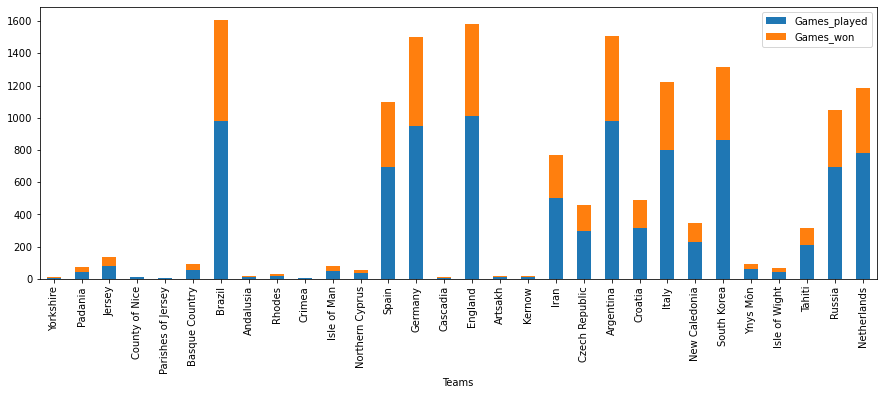

In [177]:
f=df_9.plot(x='Teams',kind='bar',stacked=True)
f.figure.set_size_inches(15, 5)

## Task
Which teams are the least successful ones? (winning percentage)

In [181]:
df_9=df_9.sort_values(by='win_perc').head(30)

In [182]:
df_9=df_9.reset_index()

In [183]:
df_9.head()

,index,away_score,away_team,city,country,date,home_score,home_team,neutral,tournament,winner,win_count,win_perc
0,San Marino,163.0,NaN,163.0,163.0,163.0,163.0,NaN,163.0,163.0,159.0,1.0,0.006135
1,Andorra,164.0,NaN,164.0,164.0,164.0,164.0,NaN,164.0,164.0,145.0,6.0,0.036585
2,Djibouti,88.0,NaN,88.0,88.0,88.0,88.0,NaN,88.0,88.0,81.0,4.0,0.045455
3,Anguilla,61.0,NaN,61.0,61.0,61.0,61.0,NaN,61.0,61.0,56.0,3.0,0.049180
4,Liechtenstein,198.0,NaN,198.0,198.0,198.0,198.0,NaN,198.0,198.0,173.0,15.0,0.075758


In [184]:
df_9.drop(columns=['away_team','city','country','date','home_score','home_team','neutral','tournament','winner','win_perc'],inplace=True)

In [185]:
df_9.rename(columns={'index':'Teams','away_score':'Games_played','win_count':'Games_won'},inplace=True)

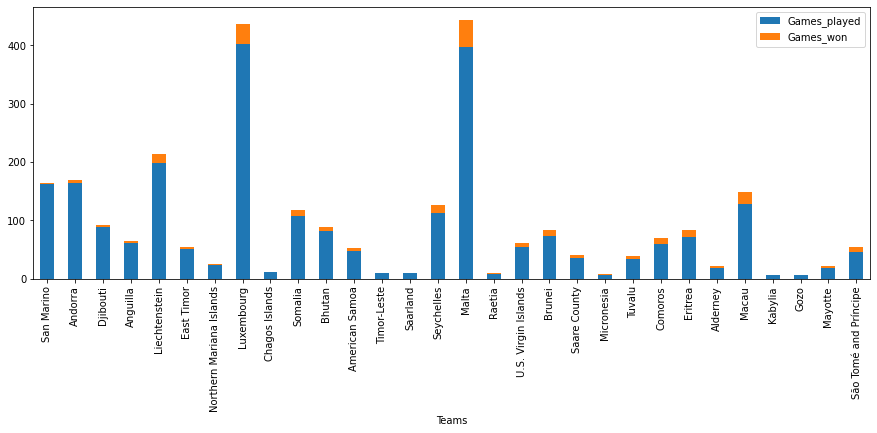

In [186]:
f=df_9.plot(x='Teams',kind='bar',stacked=True)
f.figure.set_size_inches(15, 5)

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

## Task
Which teams played against each other the most?

## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.